<a href="https://colab.research.google.com/github/AyeshaIjazTabassum/PythonAIBootcamp/blob/main/Assignement3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question**
1. Build a deep learning model using TensorFlow/Keras and for a real-world dataset.

2. Dataset choice is yours; you can utilize sources like Kaggle or datasets of keras.

In [33]:
#1. imported libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [34]:
#2. used the keras build-in dataset of house price prediction
from tensorflow.keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [35]:
#3. analyzed the shape of data
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (404, 13)
Testing data shape: (102, 13)


In [36]:
#4. preprocess the data for better results
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

In [37]:
#5. intailized the model
model = models.Sequential([
    layers.Input(shape=(13,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [38]:
#6. trained the model
history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    verbose=2
)

Epoch 1/100
6/6 - 2s - 258ms/step - loss: 557.2725 - mae: 21.7551 - val_loss: 603.1488 - val_mae: 22.8163
Epoch 2/100
6/6 - 0s - 17ms/step - loss: 523.4050 - mae: 20.9846 - val_loss: 564.2194 - val_mae: 21.9735
Epoch 3/100
6/6 - 0s - 17ms/step - loss: 483.3094 - mae: 20.0222 - val_loss: 511.9989 - val_mae: 20.7849
Epoch 4/100
6/6 - 0s - 17ms/step - loss: 428.1003 - mae: 18.6498 - val_loss: 444.1350 - val_mae: 19.1624
Epoch 5/100
6/6 - 0s - 17ms/step - loss: 359.3588 - mae: 16.8148 - val_loss: 359.0585 - val_mae: 16.9306
Epoch 6/100
6/6 - 0s - 17ms/step - loss: 275.6908 - mae: 14.4017 - val_loss: 262.4579 - val_mae: 14.0617
Epoch 7/100
6/6 - 0s - 17ms/step - loss: 188.6946 - mae: 11.4594 - val_loss: 168.4393 - val_mae: 10.5989
Epoch 8/100
6/6 - 0s - 17ms/step - loss: 114.5146 - mae: 8.4152 - val_loss: 100.2299 - val_mae: 7.5412
Epoch 9/100
6/6 - 0s - 19ms/step - loss: 74.7090 - mae: 6.6417 - val_loss: 76.2807 - val_mae: 6.8183
Epoch 10/100
6/6 - 0s - 17ms/step - loss: 67.1065 - mae: 6.3

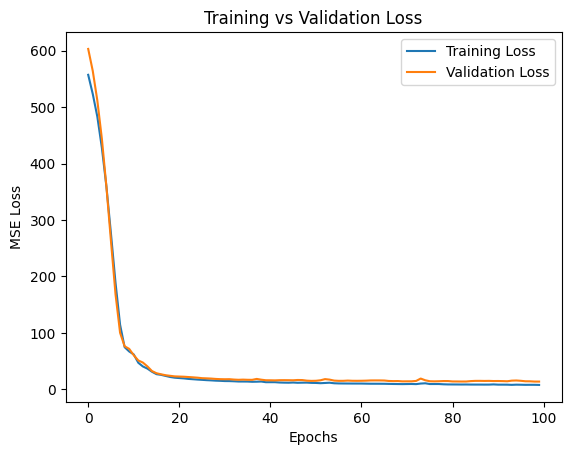

In [39]:
#7. plotted the MSE
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

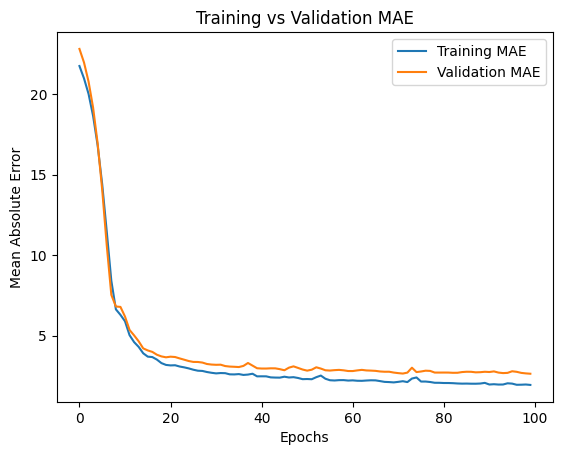

In [40]:
#8. plotted the MAE
plt.figure()
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training vs Validation MAE')
plt.show()

In [41]:
#9. printed the total MAE
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f"Test MAE: {test_mae:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19.1063 - mae: 2.9539
Test MAE: 3.13


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


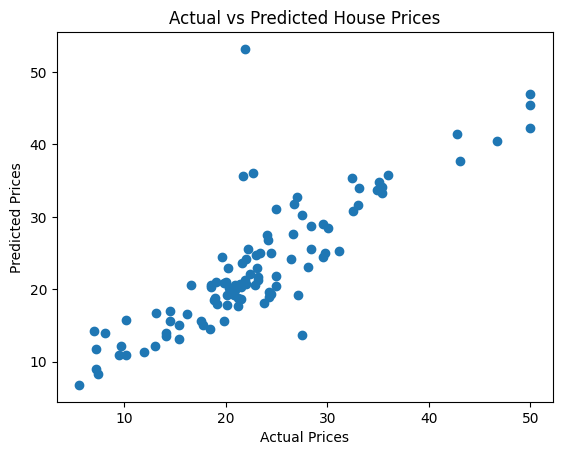

In [43]:
#10. visualized all the predictions
y_pred = model.predict(x_test).flatten()

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [44]:
#11. summary of the model
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,485 (142.52 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,324 (95.02 KB)